In [1]:
import pandas as pd
from matplotlib import pyplot
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
ts = pd.DataFrame()

In [3]:
r1 = pd.read_csv('./time_series_1.txt', sep='\n')
r2 = pd.read_csv('./time_series_2.txt', sep='\n')
r3 = pd.read_csv('./time_series_3.txt', sep='\n')

In [4]:
ts = ts.add(r1)

In [5]:
ts['ts1'] = r1
ts['ts2'] = r2
ts['ts3'] = r3

In [6]:
print(ts)

         ts1       ts2        ts3
0   1.000000  1.000000   1.000000
1   1.000000  1.000000   1.000000
2  -0.300000 -1.600000  -1.000000
3  -1.470000  1.130000  -1.200000
4  -0.222000 -0.287000   0.980000
..       ...       ...        ...
59  0.978327 -4.770411   8.926934
60 -7.655971  1.689298 -21.143999
61 -4.395118  0.739960 -11.934028
62  8.597408 -6.192577  22.064996
63  6.217578  7.951819  15.333930

[64 rows x 3 columns]


**1. Корреляция Пирсона**

In [7]:
ts.corr()

,ts1,ts2,ts3
ts1,1.000000,0.150943,0.422522
ts2,0.150943,1.000000,0.139863
ts3,0.422522,0.139863,1.000000


Коэффициент корреляции - это число между -1 и 1, которое описывает положительную или отрицательную корееляцию соответственно. Если коэф-т принял значение 0, то корреляции нет. Мы рассматриваем корреляцию между временными рядами (автокоререляцию).
В корреляционной матрице можно заметить ильную связи между **1 и 3 временными рядами**

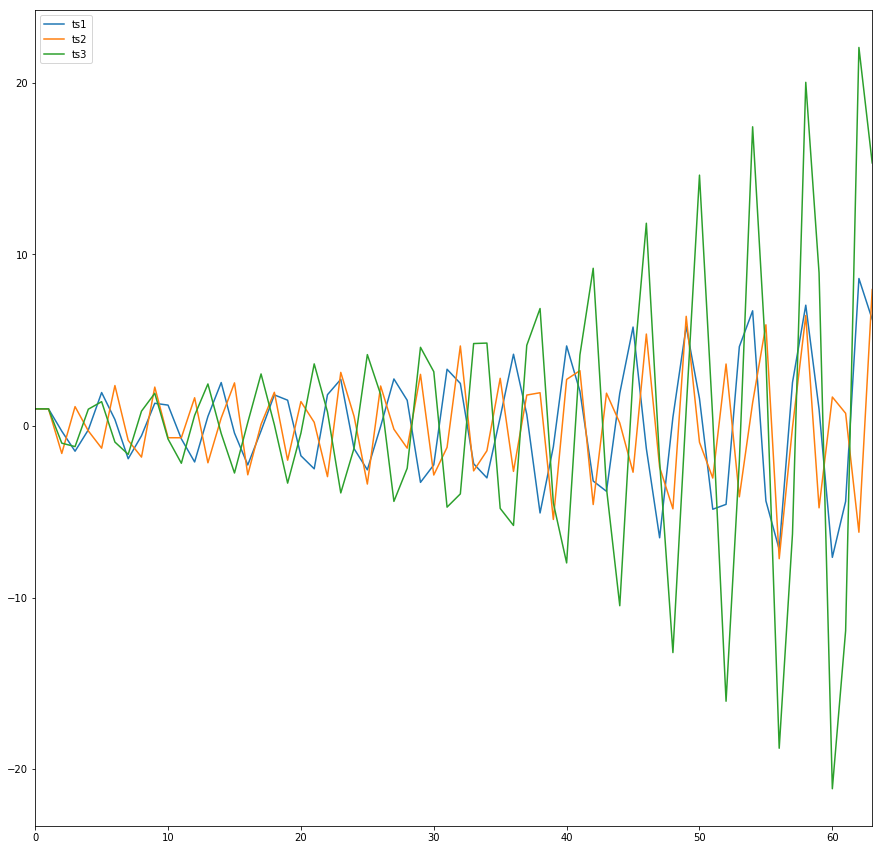

In [8]:
ts.plot(figsize = (15,15))
pyplot.show()

На графике она также заметна

**2. Алгоритм динамической транформации временной шкалы**

Деформация - сдвиг и сжатие - по временной оси 
Строим матрицу деформаций, находим оптимальный путь
Считаем, что, чем меньше минимальный путь тем ближе ряды

ts1   ts2


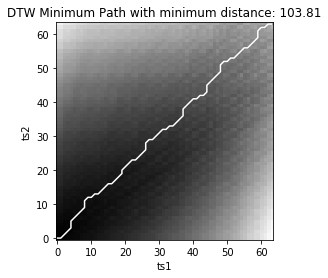

ts1   ts3


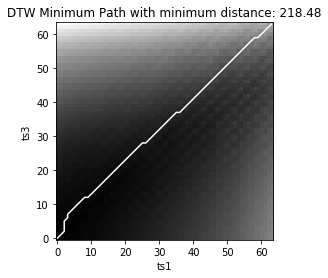

ts2   ts3


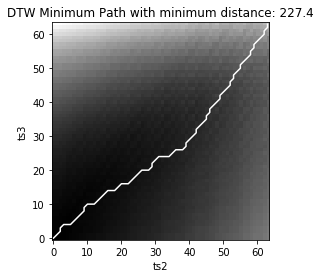

In [9]:
from dtw import dtw,accelerated_dtw
import numpy as np

column_name = ts.columns

for i in range(0,3):
    for j in range(i+1,3):

        d1 = ts[column_name[i]].interpolate().values
        d2 = ts[column_name[j]].interpolate().values
        d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

        print(column_name[i], ' ', column_name[j])
        pyplot.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
        pyplot.plot(path[0], path[1], 'w')
        pyplot.xlabel(column_name[i])
        pyplot.ylabel(column_name[j])
        pyplot.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
        pyplot.show()

Минимальное расстояние у 1 и 2 временных рядов - они связаны

**3. Анализ тренда**

Trend of ts1
Trend of ts2
Trend of ts3


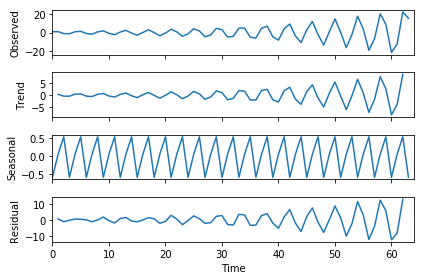

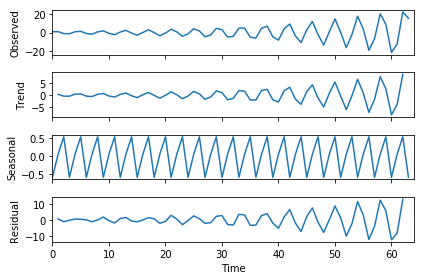

In [14]:
import statsmodels.api as sm
#decomposition = sm.tsa.seasonal_decompose(ts.ts1.values, freq=3)
#decomposition1 = sm.tsa.seasonal_decompose(ts.ts2.values, freq=3)
decomposition2 = sm.tsa.seasonal_decompose(ts.ts3.values, freq=3)
print('Trend of ts1')
#decomposition.plot()
print('Trend of ts2')
#decomposition1.plot()
print('Trend of ts3')
decomposition2.plot()
#matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

По виду трендов 1 и 3 временные ряды связаны между собой

Вывод: мы рассмотрели 3 метода решения данной задачи. 3 метод наименее применим в данной задаче, так как очень сложно определить верный период временного ряда, тем более для этого метода у нас слишком мало данных.
Самый простой и действенный метод - корреляция Пирсона